<a href="https://colab.research.google.com/github/fatihdurgut01/fatihdurgut01/blob/main/globalaihub_Medical_Cost_Personal_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Training and comparing models

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Report function
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score







In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Getting information from data
print("Samples in data: {}\n".format(data.index.stop)) # Show the number of samples in the data
data.info() # There are 1338 samples and no null elements in data

Samples in data: 1338

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Summarizing the central tendency, dispersion and shape of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
#Distribution and Relations of Samples

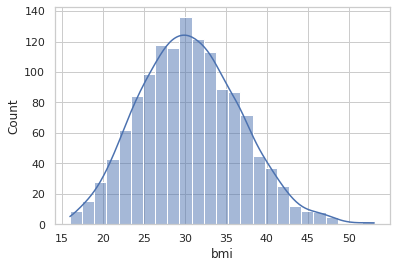

In [6]:
# Distribution of bmi
sns.set(style='whitegrid')
sns.histplot(data=data, x="bmi", kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


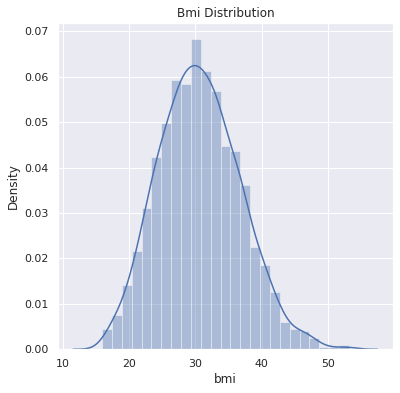

In [7]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title("Bmi Distribution")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


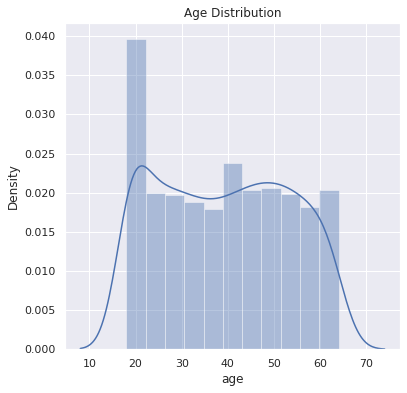

In [8]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title("Age Distribution")
plt.show()

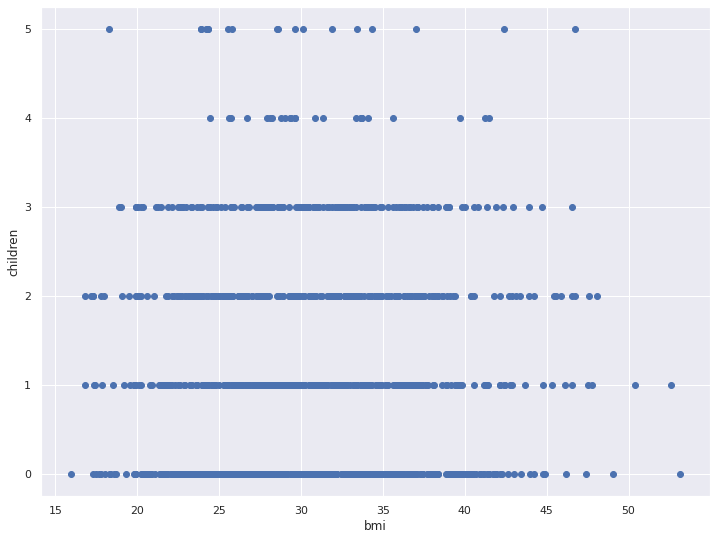

In [9]:
plt.figure(figsize=(12,9))
plt.scatter(x=data['bmi'],y=data['children'] )
plt.xlabel("bmi")
plt.ylabel("children")
plt.show()

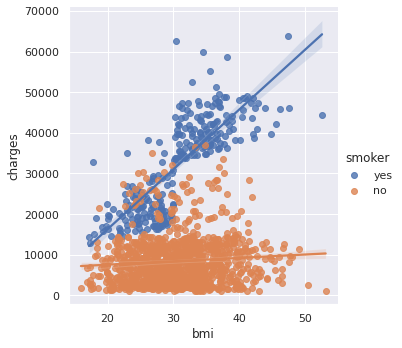

In [10]:
sns.lmplot(data=data, x='bmi', y='charges', hue='smoker')


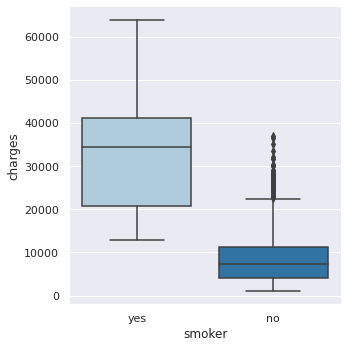

In [11]:
# Relationship between "smoker" and "charges"
sns.catplot(x="smoker", y="charges", data=data, kind="box", palette="Paired")



In [12]:
# Relationship between "region" and "smoker"

data.groupby(["region","smoker"]).size().reset_index(name="count")

,region,smoker,count
0,northeast,no,257
1,northeast,yes,67
2,northwest,no,267
3,northwest,yes,58
4,southeast,no,273
5,southeast,yes,91
6,southwest,no,267
7,southwest,yes,58


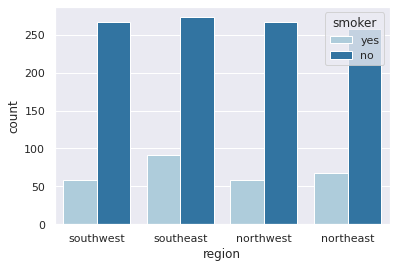

In [13]:
# Smokers based on region
sns.countplot(x="region", hue="smoker", data=data, palette="Paired")

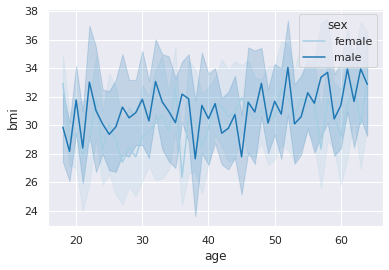

In [14]:
# Relation between "age" and "bmi"
sns.lineplot(x="age", y="bmi", hue="sex", data=data, palette="Paired") 

In [15]:
# Children count based on region
children_count = data.groupby("region")["children"].sum()
children_count

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

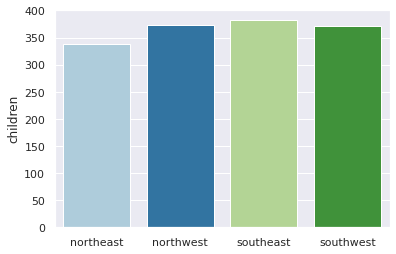

In [16]:
sns.barplot(x = children_count.index.tolist(), y = children_count, palette="Paired")

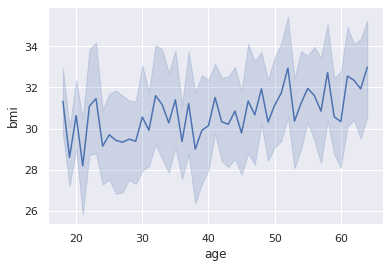

In [17]:
# Relationship between "age" and "bmi"
sns.lineplot(x="age", y="bmi", data=data, palette="Paired")

In [18]:
# Relationship between "children" and "bmi"
data.groupby(["children"])["bmi"].describe()

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,30.550296,6.039106,15.960,26.14375,30.3025,34.74625,53.13
1,324.0,30.623148,6.101435,16.815,26.61500,30.0150,34.23750,52.58
2,240.0,30.978104,6.509644,16.815,25.78625,31.6400,35.35750,48.07
3,157.0,30.684331,5.787173,18.905,27.26500,30.4950,34.32000,46.53
4,25.0,31.391200,4.627211,24.415,28.21500,29.6400,33.66000,41.47
5,18.0,29.605000,7.139686,18.300,24.30250,28.5500,33.05500,46.75


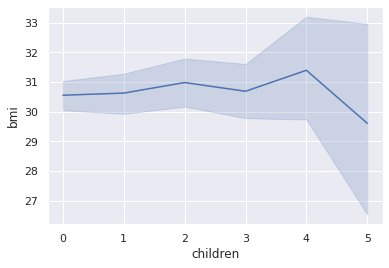

In [19]:
sns.lineplot(x = "children", y = "bmi", data=data)

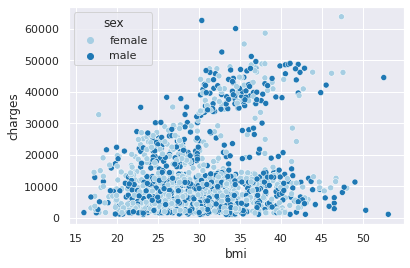

In [20]:
# Relations between "bmi" and "charges"
sns.scatterplot(x = "bmi", y="charges", hue="sex", data=data, palette="Paired")

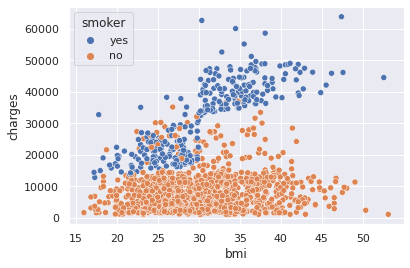

In [21]:
sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker')


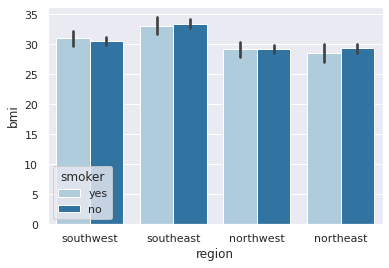

In [22]:
# Relations between "region", "smoker" and "bmi"
sns.barplot(x = "region", y = "bmi", hue = "smoker", palette="Paired", data=data)

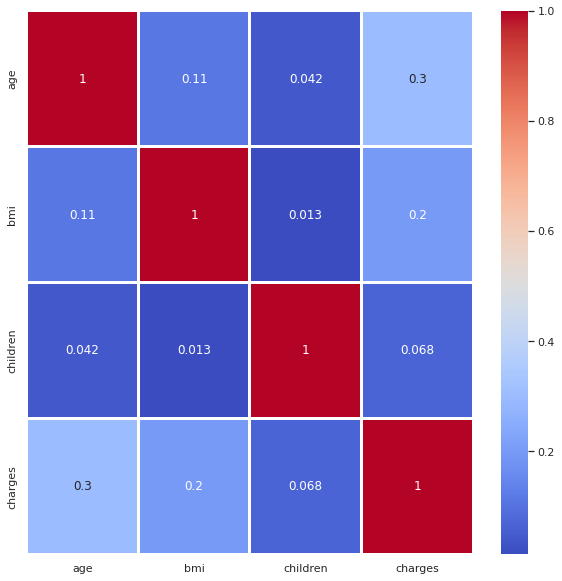

In [23]:
plt.figure(figsize=(10 ,10))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm",linewidths=2)

In [24]:
#Encoding Categorical Variables
#We need to encode categorical variables before including them into the train data.
#Therefore I will use OneHotEncoding.

In [25]:
encoded_df = pd.get_dummies(data = data, columns=["sex", "smoker", "region"])
encoded_df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [26]:
#BMI Outlier Detection with IQR

# Sorting BMI values
sorted_bmi = encoded_df["bmi"].sort_values()

In [27]:
# Calculate Q1, Q2, Q3 and IQR.
Q1 = np.percentile(sorted_bmi, 25, interpolation = 'midpoint') 
Q2 = np.percentile(sorted_bmi, 50, interpolation = 'midpoint') 
Q3 = np.percentile(sorted_bmi, 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the BMI values is, ', Q1)
print('Q1 50 percentile of the BMI values is, ', Q2)
print('Q1 75 percentile of the BMI values is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

Q1 25 percentile of the BMI values is,  26.302500000000002
Q1 50 percentile of the BMI values is,  30.4
Q1 75 percentile of the BMI values is,  34.6875
Interquartile range is 8.384999999999998


In [28]:
# Find the lower and upper limits as Q1 – 1.5 IQR and Q3 + 1.5 IQR
lowlim = Q1 - 1.5 * IQR
uplim = Q3 + 1.5 * IQR
print('Low Limit Is', lowlim)
print('Up Limit Is', uplim)

Low Limit Is 13.725000000000005
Up Limit Is 47.265


In [29]:
# Find outliers in the dataset
outliers =[]
for x in sorted_bmi:
    if ((x> uplim) or (x<lowlim)):
         outliers.append(x)
print(' Outliers in the dataset is', outliers)

 Outliers in the dataset is [47.41, 47.52, 47.6, 47.74, 48.07, 49.06, 50.38, 52.58, 53.13]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


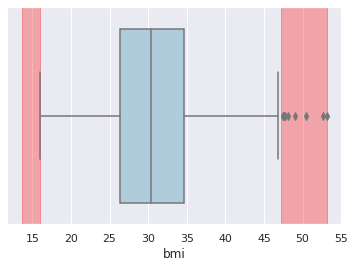

In [30]:
# Paint red outlier areas on the boxplot
sns.boxplot(sorted_bmi, palette="Paired")
plt.axvspan(xmin = lowlim, xmax = sorted_bmi.min(), alpha=0.3, color='red')
plt.axvspan(xmin = uplim, xmax = sorted_bmi.max(), alpha=0.3, color='red')

In [31]:
# Dropping outliers from data

cleandata = encoded_df[encoded_df["bmi"] < 47.41]
cleandata

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


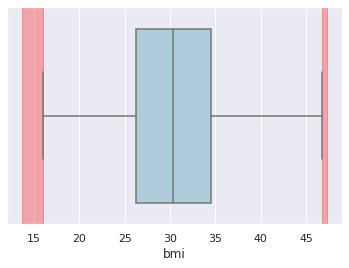

In [32]:
# Checking the outliers with a graph
sns.boxplot(cleandata["bmi"].sort_values(), palette="Paired")
plt.axvspan(xmin = lowlim, xmax = cleandata["bmi"].sort_values().min(), alpha=0.3, color='red')
plt.axvspan(xmin = uplim, xmax = cleandata["bmi"].sort_values().max(), alpha=0.3, color='red')

In [33]:
from sklearn.model_selection import train_test_split
# Splitting dependent (y: "charges") and independent (X: other features) variables 
X = cleandata.drop(["charges"], axis=1)
y = cleandata["charges"]
# Splitting X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [34]:
# Checking splitted data
print(X_train.ndim, X_test.ndim, y_train.ndim, y_test.ndim)
print("")
print(type(X_train),type(X_test),type(y_train),type(y_test))

2 2 1 1

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [35]:
# Converting pandas Series to DataFrames
y_train = y_train.to_frame()
y_test = y_test.to_frame()

In [36]:

"""The most widely used types of normalization techniques in machine learning are:

Min-max (MinMaxScaler)
Z-score (StandardScaler)
In order to implement the above techniques, the following functions are used to achieve functionality:
"""

'The most widely used types of normalization techniques in machine learning are:\n\nMin-max (MinMaxScaler)\nZ-score (StandardScaler)\nIn order to implement the above techniques, the following functions are used to achieve functionality:\n'

In [37]:
"""Scaling Data"""

'Scaling Data'

In [38]:
# Scaling data for better modelling performance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for i in [X_train, X_test, y_train, y_test]:
  scaler.fit_transform(i)
  print(scaler.mean_)

[38.99139785 30.51281183  1.11075269  0.51612903  0.48387097  0.79892473
  0.20107527  0.24731183  0.2311828   0.27096774  0.25053763]
[39.69924812 30.59453634  1.06265664  0.44862155  0.55137845  0.78947368
  0.21052632  0.23308271  0.27568922  0.26315789  0.22807018]
[12959.29163719]
[13802.12990466]


In [39]:
"""Training and Model Comparison
For the modeling part I will compare 7 known algorithms for Regression:

1: Linear Regression
2: RandomForestRegressor
3: DecisionTreeRegressor
4: GradientBoostingRegressor
5: XGBoost
"""


'Training and Model Comparison\nFor the modeling part I will compare 7 known algorithms for Regression:\n\n1: Linear Regression\n2: RandomForestRegressor\n3: DecisionTreeRegressor\n4: GradientBoostingRegressor\n5: XGBoost\n'

In [40]:
# Creating models with relevant class names
linear_regression_model = LinearRegression()

random_forest_model = RandomForestRegressor(max_depth = 3, n_estimators=500)

tree_model = DecisionTreeRegressor(max_depth = 3)

gradient_boosting_model = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

xgb_model = XGBRegressor(max_depth = 3, n_estimators=50, learning_rate =.2, objective = "reg:squarederror")

In [41]:
regressors = [('Linear Regression', linear_regression_model),
              ('Random Forest', random_forest_model), 
              ('Decision Tree', tree_model),
              ('Gradient Boosting Regressor', gradient_boosting_model), 
              ('XGBoost', xgb_model)]
             
             

In [42]:
# Instantiate the regression model
r2_scores = []

for regressor_name, model in regressors:
    
    # checking model accuracy 
    scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5, scoring="r2")
    r2_scores.append(scores.mean()*100)

    print("{} r2 Score:".format(regressor_name),str(round(sum(scores)/5*100,3))+"%\n")


Linear Regression r2 Score: 74.865%

Random Forest r2 Score: 86.168%

Decision Tree r2 Score: 85.404%

Gradient Boosting Regressor r2 Score: 85.422%

XGBoost r2 Score: 86.049%



In [43]:
#Hyperparameter Optimization

In [44]:
from sklearn.model_selection import GridSearchCV


xgb = XGBRegressor()

parameters = {
              'eta': [.03, .07, 0.1],
              "min_child_weight": [.1, .5, 1],
              "max_depth" : [4, 5, 6, 7]}


xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 5,
                        n_jobs = -1
                        )

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
         

[19:55:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8531151702340166
{'eta': 0.03, 'max_depth': 4, 'min_child_weight': 0.1}


In [45]:
#Model Evaluation

# Calculation of RMSE, RMAE and r2_score
rmse = cross_val_score( XGBRegressor(learning_rate=0.03, max_depth = 4, min_child_weight = 0.1), X_train, y_train ,cv=5, scoring = "neg_mean_squared_error")
print("Mean Squared Error of XGBoost:", (rmse, 3))

rmae = cross_val_score( XGBRegressor(learning_rate=0.07, max_depth = 4, min_child_weight = 0.1), X_train, y_train ,cv=5, scoring = "neg_mean_absolute_error")
print("Mean Absolute Error of XGBoost:", (rmae, 3))

r2 = cross_val_score( XGBRegressor(learning_rate=0.07, max_depth = 4, min_child_weight = 0.1), X_train, y_train ,cv=5, scoring = "r2").mean() # Generally used to determine how good is the model. 
print("r2 Score of XGBoost:",str(round(r2*100,4))+"%\n")

[19:55:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error of XGBoost: (array([-26046238.95193552, -16161124.19527791, -23020917.26109162,
       -15963901.58469889, -16421015.38670254]), 3)
[19:55:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:55:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now d